<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Author List</title>
    <style>
        .author-container {
            display: flex;
            flex-wrap: wrap;
            justify-content: center;
            text-align: center;
            margin: 0 auto;
            max-width: 800px; /* Adjust as needed */
        }
        .author {
            flex: 1 1 25%;
            box-sizing: border-box;
            padding: 10px;
        }
        .single-author {
            width: 100%;
            padding: 10px;
            box-sizing: border-box;
        }
    </style>
</head>

<center>

<h1> O impacto das Unidades de Pronto Atendimento (UPAs) 24h sobre indicadores de mortalidade: uma análise para o Estado de São Paulo no período 2010-2019 </h1>

<body>
    <div class="author-container">
        <div class="author">
            <strong>Ruth Pereira di Rada</strong><br>
        </div>
        <div class="author">
            <strong>Ryan Alef de Souza Costa</strong><br>
        </div>
        <div class="author">
            <strong>Vitor Baldoino</strong><br>
        </div>
    </div>
</body>
<br>
</center>

***

## Introdução

Recentemente, a partir da pandemia da covid-19 e suas implicações nas mais diversas esferas sociais, questões relacionadas à saúde têm tomado crescente relevância no debate público. Todavia, a despeito da crise sanitária global, tópicos como o colapso em atendimentos de emergência hospitalares já vinham sendo preocupação central nas reflexões sobre os modelos de apoio à saúde em diferentes nações. A partir disso, tendo como referencial básico Rocha e Fernandes (2016) e Silva, Santos e Alves (2020), o propósito deste trabalho é avaliar de forma empírica o impacto das Unidades de Pronto Atendimento (UPAs) 24h sobre as taxas de mortalidade nos municípios do estado de São Paulo a partir de uma estrutura de dados em painel para o período 2010-2019.

Sendo parte integrante da assistência pré-hospitalar, a UPA funciona como um estabelecimento fixo de saúde intermediário - entre as Unidades Básicas de Saúde (UBS) e de Saúde da Família e os hospitais. Exerce funções de acolhimento de usuários independentemente do nível de urgência, incluindo casos de menor gravidade e realização de consultas médicas, entre outras atribuições, devendo ser vinculadas a um hospital de retaguarda. Dessa forma, ela tem como responsabilidade compensar a insuficiência na oferta de atenção básica e suavizar a pressão por atendimento ambulatorial no sistema hospitalar de quadros como febre alta, infarto, derrame, queda com suspeita de fratura, entre outros, podendo atender pacientes que antes iriam a hospitais e, eventualmente, acolher casos mais graves ou óbitos. 

Neste trabalho, o nosso período de análise cobre entres os anos 2010 e 2019, de modo considerar o período antes e depois da implementação desse serviço no estado, cuja primeira implantação se deu em 2014, na cidade de São Paulo, além de isolar para os possíveis efeitos de choque da pandemia COVID-19, cujas implicações foram mais perceptíveis no Brasil a partir de 2020.



## Dados

|                         | Observações (municípios * anos) | Média  | Desvio-padrão | Média 2010 | Média 2019 | Variação 2010-2019 (%) |
|-------------------------|---------------------------------|--------|---------------|------------|------------|------------------------|
| Mortalidade total       | 1.878.463                       | 294,02 | 2.165,75      | 276,22     | 305,81     | 10,71                  |
| Por local de ocorrência |                                 |        |               |            |            |                        |
| Em casa                 | 277.983                         | 43,51  | 302,25        | 37,83      | 49,02      | 29,57                  |
| Na rua                  | 67.132                          | 10,51  | 47,85         | 10,87      | 8,83       | -18,76                 |
| No hospital             | 1.358.259                       | 212,59 | 1.742,37      | 204,14     | 217,97     | 6,77                   |
| UPA e outros            | 175.085                         | 27,04  | 102,07        | 23,41      | 29,97      | 28,02                  |

Vemos que a explicita a ocorrência de uma elevação em 10% no número de óbitos no estado de São Paulo entre 2010 e 2019. A maioria das mortes ocorre em hospitais. Entretanto, o maior aumento relativo é observado em domicílios e, em segundo lugar, em outros estabelecimentos de saúde - justamente nos locais nos quais as UPAs entram na classificação, além de ambulatórios e postos de saúde.

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_excel(
    "data/processed/base-regressao.xlsx",
    usecols=[
        "ano",
        "id_municipio_7digitos",
        "nome_municipio",
        "mortes",
        "mortes_domicilio",
        "mortes_hospital",
        "mortes_info_ignorada",
        "mortes_outro_estab_saude",
        "mortes_outros_locais",
        "mortes_via_publica",
        "populacao",
        "samu",
        "upas",
        "partido",
    ],
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389 entries, 0 to 6388
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ano                       6389 non-null   int64 
 1   id_municipio_7digitos     6389 non-null   int64 
 2   nome_municipio            6389 non-null   object
 3   mortes                    6389 non-null   int64 
 4   mortes_domicilio          6389 non-null   int64 
 5   mortes_hospital           6389 non-null   int64 
 6   mortes_info_ignorada      6389 non-null   int64 
 7   mortes_outro_estab_saude  6389 non-null   int64 
 8   mortes_outros_locais      6389 non-null   int64 
 9   mortes_via_publica        6389 non-null   int64 
 10  populacao                 6389 non-null   int64 
 11  samu                      6389 non-null   int64 
 12  upas                      6389 non-null   int64 
 13  partido                   6389 non-null   int64 
dtypes: int64(13), object(1)


In [21]:
EDA = df[
    [
        "ano",
        "id_municipio_7digitos",
        "nome_municipio",
        "populacao",
        "upas",
        "samu",
        "partido",
        "mortes_domicilio",
        "mortes_hospital",
        "mortes_info_ignorada",
        "mortes_outro_estab_saude",
        "mortes_outros_locais",
        "mortes_via_publica",
    ]
]

EDA = EDA.melt(
    id_vars=[
        "ano",
        "id_municipio_7digitos",
        "nome_municipio",
        "populacao",
        "upas",
        "samu",
        "partido",
    ],
    value_vars=[
        "mortes_domicilio",
        "mortes_hospital",
        "mortes_info_ignorada",
        "mortes_outro_estab_saude",
        "mortes_outros_locais",
        "mortes_via_publica",
    ],
    var_name="local_da_morte",
    value_name="mortes_desagregadas",
)

EDA = EDA.assign(
    mortes_desagregadas_pc=EDA["mortes_desagregadas"] / EDA["populacao"],
    upas_pc=EDA["upas"] / EDA["populacao"],
    d_upa=(EDA["upas"] > 0).astype("int"),
)

EDA = EDA.rename(
    {
        "ano": "Ano",
        "id_municipio_7digitos": "ID",
        "nome_municipio": "Município",
        "populacao": "População Total",
        "upas": "Quantidade de UPAs",
        "samu": "Presença de SAMU",
        "partido": "Convergência Política",
        "local_da_morte": "Local da Morte",
        "mortes_desagregadas": "Quantidade de Mortes",
        "mortes_desagregadas_pc": "Quantidade de Mortes Per Capita",
        "upas_pc": "Quantidade de UPAs Per Capita",
        "d_upa": "Presença de UPA",
    },
    axis=1,
)

EDA = EDA.replace(
    {
        "mortes_domicilio": "Em casa",
        "mortes_hospital": "Hospital",
        "mortes_info_ignorada": "N/A",
        "mortes_outro_estab_saude": "UPA e outros",
        "mortes_outros_locais": "N/A",
        "mortes_via_publica": "Na rua",
    }
)

EDA.head()

,Ano,ID,Município,População Total,Quantidade de UPAs,Presença de SAMU,Convergência Política,Local da Morte,Quantidade de Mortes,Quantidade de Mortes Per Capita,Quantidade de UPAs Per Capita,Presença de UPA
0,2010,3500105,ADAMANTINA,33797,0,1,0,Em casa,16,0.000473,0.0,0
1,2010,3500204,ADOLFO,3557,0,0,0,Em casa,7,0.001968,0.0,0
2,2010,3500303,AGUAI,32148,0,0,0,Em casa,15,0.000467,0.0,0
3,2010,3500402,AGUAS DA PRATA,7584,0,0,0,Em casa,0,0.000000,0.0,0
4,2010,3500501,AGUAS DE LINDOIA,17266,0,0,1,Em casa,36,0.002085,0.0,0


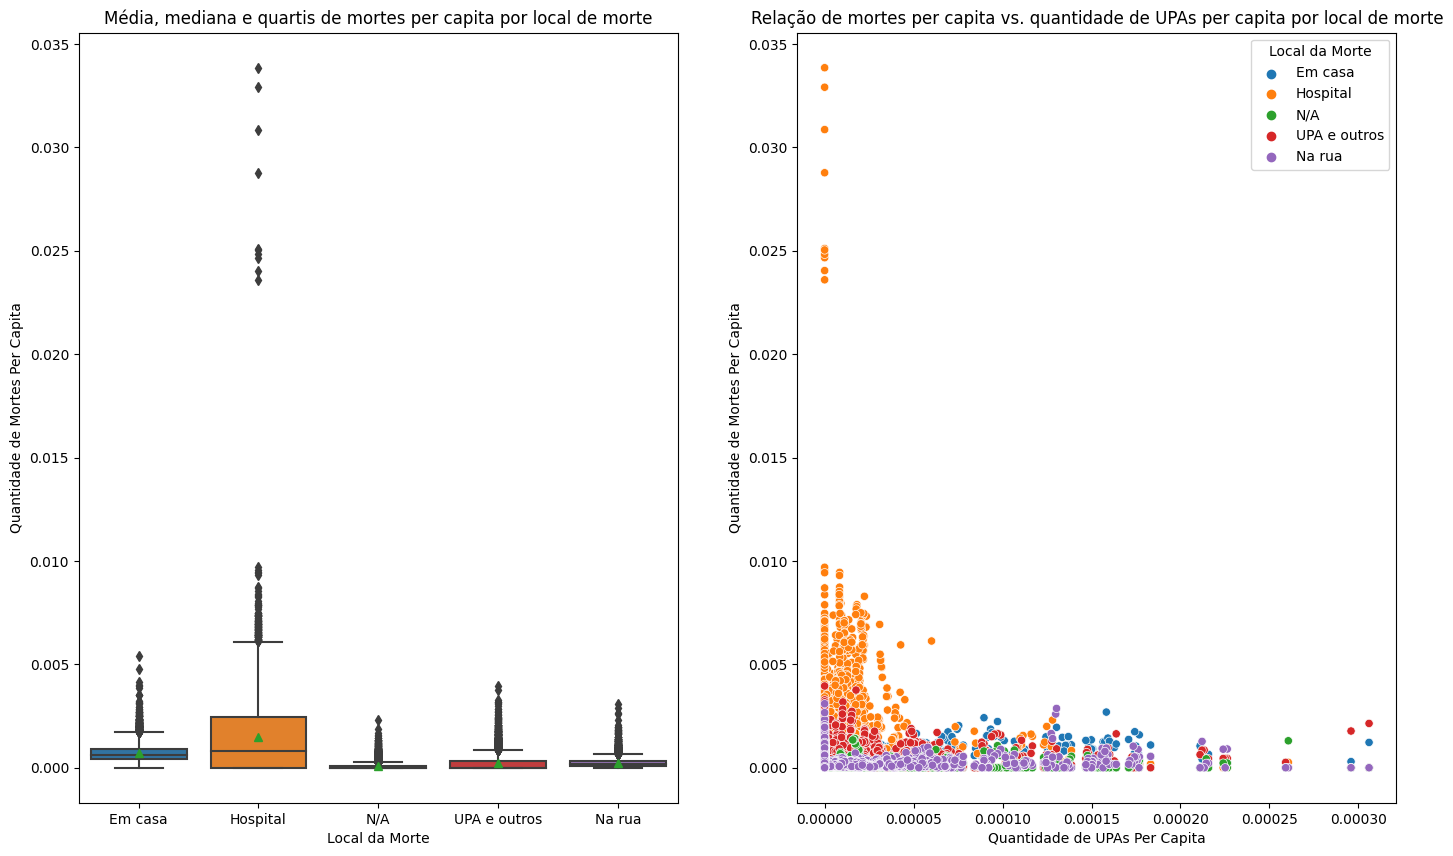

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

sns.boxplot(data=EDA, x="Local da Morte", y="Quantidade de Mortes Per Capita", showmeans=True, ax=axes[0])
sns.scatterplot(data=EDA, x="Quantidade de UPAs Per Capita", y="Quantidade de Mortes Per Capita", hue="Local da Morte", ax=axes[1])

axes[0].set_title("Média, mediana e quartis de mortes per capita por local de morte")
axes[1].set_title("Relação de mortes per capita vs. quantidade de UPAs per capita por local de morte")

plt.show()

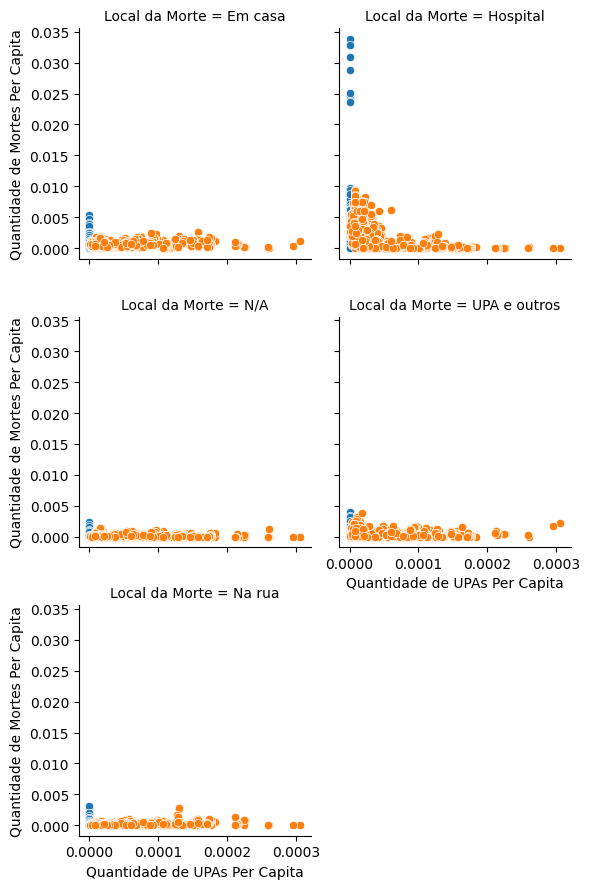

In [23]:
grid = sns.FacetGrid(EDA, col="Local da Morte", hue="Presença de UPA", height=3, aspect=1, col_wrap=2)

grid.map(sns.scatterplot, "Quantidade de UPAs Per Capita", "Quantidade de Mortes Per Capita")

plt.show()

A inspeção visual do último gráfico demonstra que a presença de mais UPAs em um dado município está associada a uma diminuição da mortalidade em alguns locais. Trataremos disso mais adiante, mas, *a priori*, não é claro que as UPAs deveriam causar uma redução da mortalidade. Dada sua atuação como estabelecimento de saúde intermediário, o que pode acontecer com as UPAs é simplesmente um deslocamento das mortes que ocorreriam em outros lugares para elas.

## Identificação do Modelo Empírico

Pretendemos isolar o impacto da variação na quantidade de UPAs sobre as taxas de mortalidade dos municípios paulistas. Para esse fim, montamos um painel de dados ao nível do município-ano para o período entre 2010 e 2019. Nessa base, UPA, a variável de interesse, é definida pelo número de UPAs *per capita* (por 100 mil habitantes) em cada município e em cada ano. As taxas de mortalidade total, por local de ocorrência e causa do óbito, variam igualmente (*per capita*, por 100 mil habitantes), tal qual as demais variáveis não binárias. O nosso modelo empírico é dado pela seguinte equação (1):

$$M_{it} = \alpha + \beta UPA_{it} + \delta X_{it} + \varepsilon_{it} \qquad (1),$$
$$i = 1, \dots, N; \ t = 1, \dots, T \ \text{e onde} \ \varepsilon_{it} = \varphi_i + u_{it}$$

$M_{it}$ é representante do número de óbitos per capita multiplicado por 100 mil do município $i$ no momento $t$. O termo $UPA_{it}$ é definido como a quantidade de unidades de pronto atendimento por 100 mil habitantes em um município $i$ no momento $t$. Assim, $\beta$ é nosso coeficiente de interesse. Tal qual tipicamente observado em estruturas de dados em painel, o termo de erro $\varepsilon_{it}$ é composto por duas partes, onde $\varphi_i$ é o erro estocástico - o efeito fixo - enquanto $u_{it}$ é denominado distúrbio idiossincrático, o erro temporal. O efeito fixo inclui uma variável *dummy* para cada ano entre 2010 e 2019, que exprime os efeitos de mudanças de ciclos compartilhados entre os municípios e correlacionadas com a introdução das UPAs - tal qual ciclos macroeconômicos e epidemiológicos, entre outros, e os efeitos fixos de município, que sintetizam características específicas às cidades em análise, como condições climáticas e infraestrutura do sistema de saúde.

$X_{it}$ é a matriz de demais variáveis controle, de modo que $\delta$ é o vetor de parâmetros associados aos efeitos delas. Constituem esse grupo:

1. Uma *dummy* que explicita se o prefeito do município era filiado ou não ao mesmo partido do governador. A partir disso, buscamos incluir o fator endógeno existente na distribuição de recursos públicos potencialmente relacionados com a criação de UPAs e de outras políticas públicas relacionadas com o nível de atividade local e os indicadores de saúde. Os dados foram extraídos do Tribunal Superior Eleitoral.
2. A existência de unidades móveis de urgência (SAMUs) foi incluída no modelo por atuar de maneira integrada com as UPAs. Essa variável foi aplicada como binária, informando a presença ou ausência desse mecanismo, tendo como fonte o Datasus.
3. *Proxies* para a qualidade de vida dos moradores do município e urbanização, a partir de indicadores socioeconômicos e de infraestrutura. Foram incluídas variáveis como PIB *per capita* anual, quantidade de ligações ativas de água e volume tratado de esgoto. A primeira tem como fonte o Instituto Brasileiro de Geografia e Estatística (IBGE) e, as demais, o Sistema Nacional de Informações sobre Saneamento (SNIS).

No caso da variável política (i), não foi considerada a possibilidade de mudanças de governante durante o período de 4 anos, tampouco do prefeito ou governador trocar de partido durante seu mandato e a existência de coligações entre partidos distintos. A habilidade política do prefeito em negociar também não é incluída no modelo, dado seu caráter não observável, podendo criar um problema de endogeneidade com o erro idiossincrático.

Em relação ao terceiro bloco (iii) de variáveis, cabe ressaltar que tais dados são recolhidos ao nível federal por autodeclaração dos prestadores; logo, há a possibilidade de erros de medida, além do desconhecimento público quanto ao que a reportagem "0" significaria. O uso das variáveis foi mantido, seguindo a literatura no tema.

Por fim, a falta de informações geográficas e da capacidade de atendimento de cada UPA na nossa regressão também podem ter impacto na análise. Tal ausência impede quantificar as implicações diferenciais na mortalidade dos bairros mais próximos, dado que algumas unidades podem ter maior faculdade de atuação, na prática, somente em determinado raio.

O efeito individual pode ou não ser correlacionado com o vetor de regressores $X_{it}$. Isso pode ser mapeado pelo Teste de Hausman, cuja hipótese nula é de não-correlação entre $\varphi_{it}$ e as variáveis explicativas do modelo. Caso rejeitada, a estimação mais adequada será pelo estimador de efeitos fixos; do contrário, o estimador de efeitos aleatórios será consistente e, pela menor variância, deverá ser o utilizado. Para a detecção do efeito fixo, usaremos o teste de Breusch-Pagan. Não obstante, iremos também aplicar um modelo de mínimos quadrados ordinários (MQO) com dados em *pooling* como construção de *benchmark* para nossa análise.

## Resultados

In [24]:
from src.results import resultados

resultados()

Variável dependente: taxa de mortalidade (óbitos/população) * 100.000  \
                                                                                       Total   
                                                                           MQO (pooling) (1)   
UPA per capita                                                  -3,027***                      
Observações                                                         6.389                      
R^2                                                                 0,134                      
Número de Municípios                                                  645                      
Efeitos Fixos                                                         Não                      
Controles                                                             Sim                      
Teste de Hausman                                                        -                      
Teste de Breusch-Pagan                                                  -                      

                                                                        \
                                                                         
                       Efeitos Aleatórios (2) Efeitos Fixos (LSDV) (3)   
UPA per capita                         -0,894                   -0,719   
Observações                             6.389                    6.389   
R^2                                     0,007                    0,006   
Número de Municípios                      645                      645   
Efeitos Fixos                             Sim                      Sim   
Controles                                 Sim                      Não   
Teste de Hausman                       4,8951                        -   
Teste de Breusch-Pagan                 9,4999                        -   

                                                                          \
                                                                 Em casa   
                       Efeitos Fixos (LSDV) (4) Efeitos Fixos (LSDV) (5)   
UPA per capita                           -0,827                  -0,633*   
Observações                               6.389                    6.389   
R^2                                       0,013                    0,011   
Número de Municípios                        645                      645   
Efeitos Fixos                               Sim                      Sim   
Controles                                   Sim                      Sim   
Teste de Hausman                              -                        -   
Teste de Breusch-Pagan                        -                        -   

                                                                          \
                                         Na rua              No hospital   
                       Efeitos Fixos (LSDV) (6) Efeitos Fixos (LSDV) (7)   
UPA per capita                           -0,261                -1,000***   
Observações                               6.389                    6.389   
R^2                                       0,032                    0,011   
Número de Municípios                        645                      645   
Efeitos Fixos                               Sim                      Sim   
Controles                                   Sim                      Sim   
Teste de Hausman                              -                        -   
Teste de Breusch-Pagan                        -                        -   

                                                 
                                   UPA e outros  
                       Efeitos Fixos (LSDV) (8)  
UPA per capita                         0,992***  
Observações                               6.389  
R^2                                       0,031  
Número de Municípios                        645  
Efeitos Fixos                               Sim  
Controles                                   Sim  
Teste de Hausman           

> Elaboração própria. Nota:  ``*``; ``**``; ``***`` representam significância p < 0,1, p < 0,05 e p < 0,01, respectivamente

> As regressões foram rodadas através do R, é possível conferir o script [aqui](/script-regressao-impacto-upas-sp-econometria-ii.R)

Tal qual observado na tabela acima, a desconsideração das características individuais inerentes aos municípios na regressão em *pooling* afeta os resultados, gerando estimações viesadas, como observado pelo resultado do Teste Breusch-Pagan, cuja hipótese nula de que a variância do efeito fixo seja igual a 0 é rejeitada. Além disso, conforme o que se verifica na coluna (2), o Teste de Hausman também rejeita sua nula, denotando que o estimador de efeitos fixos é o mais adequado para a estimação do modelo.

Isso posto, vê-se que nas colunas (3) e (4) achamos resultados pontuais negativos; entretanto, não significativos para mortes totais, tal qual para os óbitos ocorridos na rua. Nas demais regressões, observamos que as UPAs apresentam um efeito negativo e pouco significativo sobre óbitos ocorridos em casa e em hospitais. Apesar disso, é interessante notar como no caso dos hospitais há um coeficiente de magnitude relativamente alta (-1,00) e significante para níveis de *p-valor* menores que 5%, indicando o potencial impacto dessas unidades em debate no sistema de saúde regional. Além de robustos, o coeficiente associado a mortes ocorridas em UPAs e outros estabelecimentos de saúde (em que as próprias UPAs estão classificadas) apresenta-se positivo, o que daria a interpretação de que a instalação de uma UPA em dado município estaria associada ao aumento de cerca de 1 óbito por ano nesses estabelecimentos. Esse resultado sugere uma transferência parcial dos óbitos por local de ocorrência.

## Considerações Finais

O trabalho avalia empiricamente como e em que escala as UPAs 24h influenciaram as taxas anuais de mortalidade nos municípios de SP. Observamos resultados que sugerem um impacto de realocação de lugar de ocorrência de morte em função da presença de UPAs, indicando um potencial cumprimento do papel intermediário dessas estruturas no quesito lidar com casos emergenciais de modo a se evitar a sobrecarga de hospitais e outros serviços que lidam com tais quadros clínicos sensíveis. Todavia, além das limitações das variáveis mencionadas na seção que descreve nosso modelo econométrico, exercícios mais robustos que incluam contextos mais específicos, como causa de óbito e informações sobre municípios com (ou não) hospitais atendendo urgência pelo SUS podem ser necessários para a obtenção de estimativas mais significativas, um indício já demonstrado ao obtermos melhores resultados quando desagregamos a análise por local de ocorrência.

## Referências

> 1. Heiss F. Using R for Introductory Econometrics. Düsseldorf: Independently published; 2020.
> 
> 2. Heiss F, Brunner D. Using Python for Introductory Econometrics. New York: Independently published; 2020.
> 
> 3. Wooldridge JM. Introductory Econometrics: A Modern Approach. Sixth edition, student edition. Boston, MA: Cengage Learning; 2016.
> 
> 4. Mendonça MJC de, Motta RS da. Saúde e saneamento no Brasil. Texto para Discussão (TD) 1081: Saúde e saneamento no Brasil. Disponível em: https://repositorio.ipea.gov.br/handle/11058/2079
> 
> 5. Rocha R, Fernandes LM da S. O Impacto das Unidades de Pronto Atendimento (UPAs) 24h sobre indicadores de mortalidade: evidências para o Rio de Janeiro. Disponível em: https://repositorio.ipea.gov.br/handle/11058/7503
> 
> 6. Silva MF da, Santos JO, Alves J da S. Impacto das Unidades de Pronto Atendimento 24h sobre indicadores de morbimortalidade: uma análise com dados em painel para o estado do Rio Grande do Norte e região metropolitana de Natal no período 2010-2016. Revista Meta: Avaliação. 31 de agosto de 2020.